Risk Table Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    557 non-null    int64         
 1   riskID                557 non-null    object        
 2   riskName              557 non-null    object        
 3   riskDescription       557 non-null    object        
 4   riskCategory          557 non-null    object        
 5   riskObjective         557 non-null    object        
 6   riskImpactLevel       557 non-null    int64         
 7   riskProbabilityLevel  557 non-null    int64         
 8   riskScore             557 non-null    int64         
 9   riskResponse          557 non-null    object        
 10  riskOwner             557 non-null    object        
 11  riskResponseActivity  557 non-null    object        
 12  submittedBy           557 non-null    object        
 13  cre

/tmp/ipykernel_19656/2073348456.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=risk_df, x='riskCategory', order=risk_df['riskCategory'].value_counts().index, ax=axs[0, 1], palette='Set2')


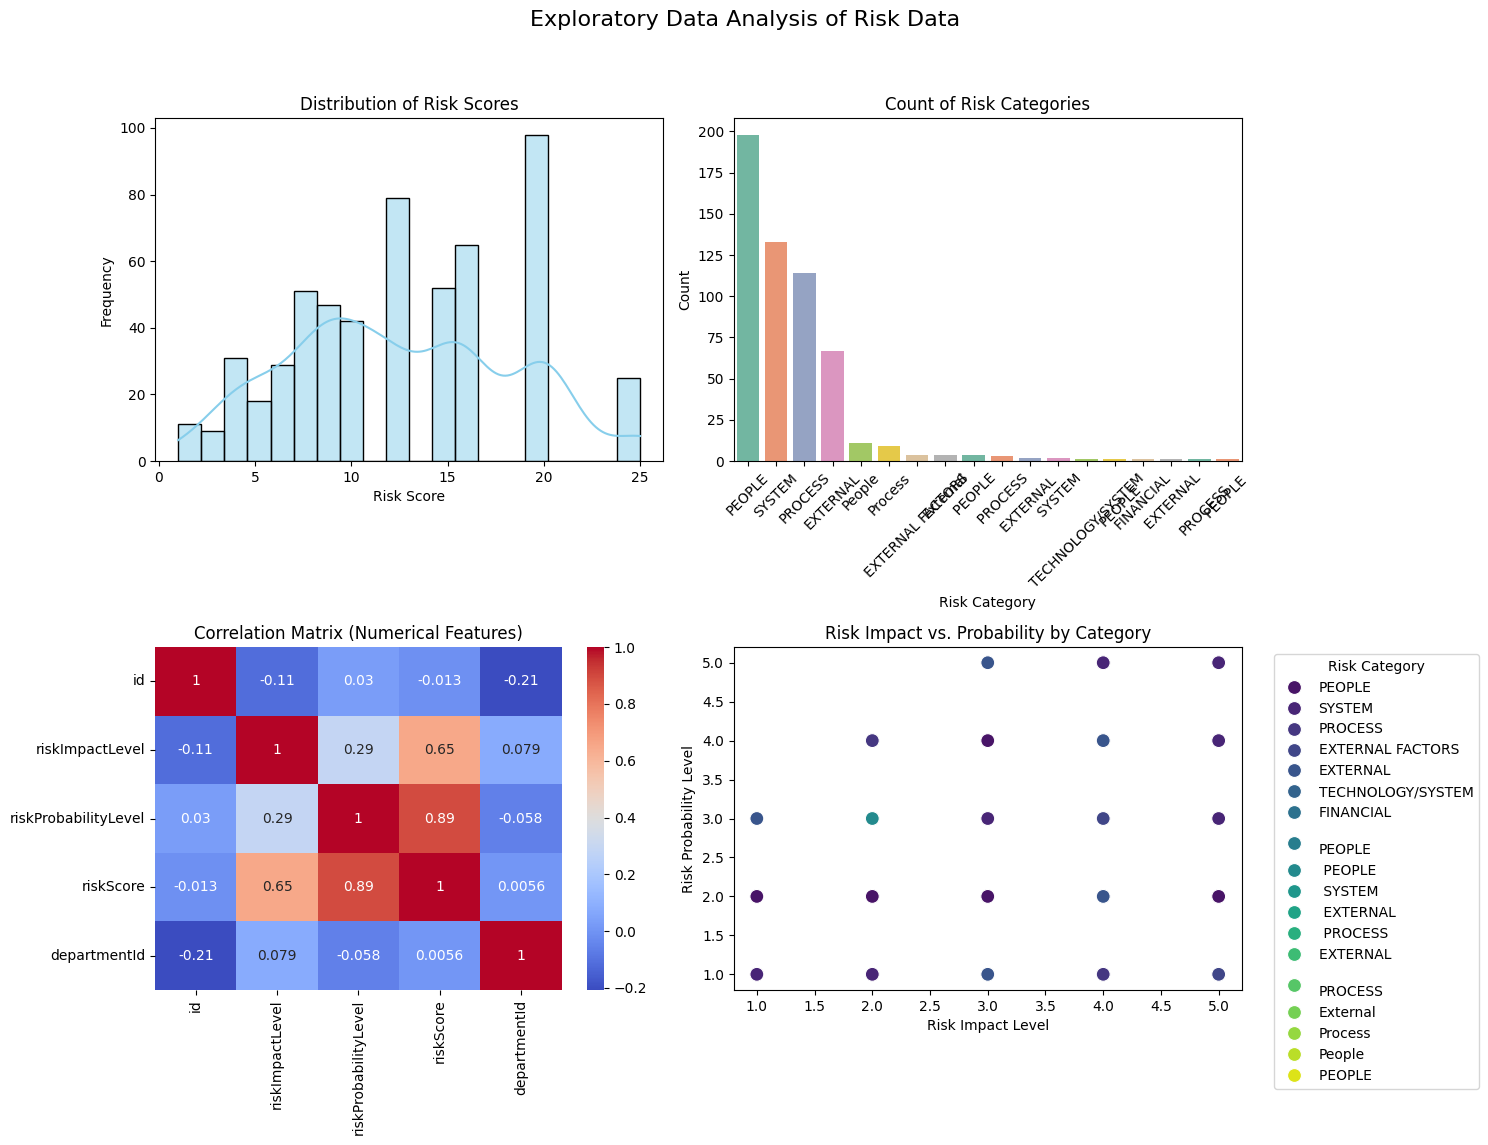

/tmp/ipykernel_19656/2073348456.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=risk_df, x='riskCategory', y='riskScore', palette='Set3')


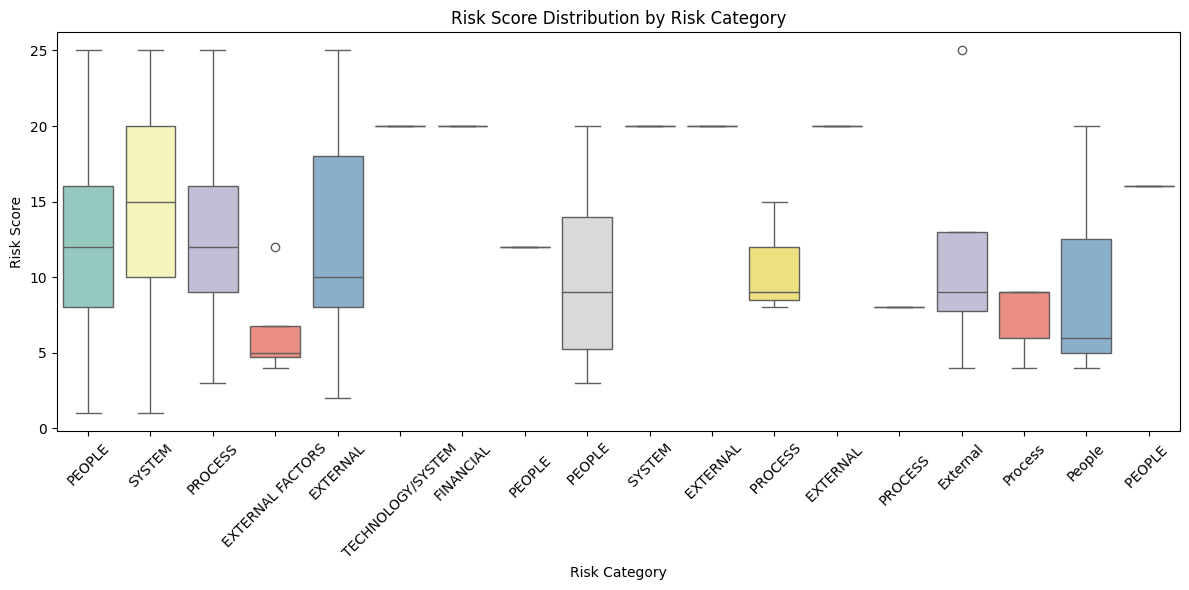

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.helpers import load_data_from_db

# Load the relevant tables
risk_df = load_data_from_db("Risk")
risk_mitigation_df = load_data_from_db("RiskMitigation")
risk_monitoring_df = load_data_from_db("RiskMonitoring")
department_df = load_data_from_db("Department")
user_df = load_data_from_db("User")
organization_df = load_data_from_db("Organization")

# Display basic info in the console
print("Risk Table Info:")
print(risk_df.info())
print(risk_df.head())

print("\nMissing Values in Risk Table:")
print(risk_df.isnull().sum())

# Create subplots for enhanced visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis of Risk Data', fontsize=16)

# 1. Distribution of Risk Scores
sns.histplot(risk_df['riskScore'], bins=20, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Distribution of Risk Scores")
axs[0, 0].set_xlabel("Risk Score")
axs[0, 0].set_ylabel("Frequency")

# 2. Count of Risk Categories
# If the riskCategory values are case-sensitive, you may want to standardize them first.
sns.countplot(data=risk_df, x='riskCategory', order=risk_df['riskCategory'].value_counts().index, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title("Count of Risk Categories")
axs[0, 1].set_xlabel("Risk Category")
axs[0, 1].set_ylabel("Count")
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Correlation Matrix of Numerical Features
numerical_cols = risk_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = risk_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=axs[1, 0])
axs[1, 0].set_title("Correlation Matrix (Numerical Features)")

# 4. Scatter Plot: Risk Impact Level vs. Risk Probability Level colored by Risk Category
sns.scatterplot(data=risk_df, x='riskImpactLevel', y='riskProbabilityLevel', hue='riskCategory', ax=axs[1, 1], palette='viridis', s=100)
axs[1, 1].set_title("Risk Impact vs. Probability by Category")
axs[1, 1].set_xlabel("Risk Impact Level")
axs[1, 1].set_ylabel("Risk Probability Level")
axs[1, 1].legend(title="Risk Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional Analysis (Optional):

# Boxplot for Risk Score by Risk Category to detect outliers and understand score distribution per category
plt.figure(figsize=(12, 6))
sns.boxplot(data=risk_df, x='riskCategory', y='riskScore', palette='Set3')
plt.title("Risk Score Distribution by Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Risk Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# If needed, you can also merge data from risk and risk mitigation tables
# merged_df = pd.merge(risk_df, risk_mitigation_df, left_on='id', right_on='riskId', how='left')
# print(merged_df.head())
